# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

In [1]:
#import cv2
import matplotlib.pyplot as plt

In [2]:
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers

import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.utils import plot_model

## Практическое задание

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10


In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

* AlexNet: an 8-layered NN with 5 conv layers and 3 dense layers with relu as an activation function.
The condition (conv-pool)-(conv-pool):
if we pair each convolutional (even excepting the last fifth) layer with pooling layer we get 12 layers total (and flattening layer preceeding the first of the dense) but so much pooling will reduce dimentions from 28 to a very small size. We'll give it a try, but it will hardly give the dense layers any info to work on even with multiple filters. So we'll use pooling only after the first and the forth convolutional layers.

In [4]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(3, 5, strides=(1, 1), activation='relu', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(6, 3, strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the fifth conv layer
model.add(layers.Conv2D(6, 5, strides=(1, 1), activation='relu', padding='same'))

# the sixth pooling layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the seventh conv layer
model.add(layers.Conv2D(10, 5, strides=(1, 1), activation='relu', padding='same'))

# the eighth pooling layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the ninth conv layer
model.add(layers.Conv2D(16, 3, strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# the tenth dense layer
model.add(layers.Dense(76, activation='relu'))
# the el dense layer
model.add(layers.Dense(84, activation='relu'))
# the tenth dense layer
model.add(layers.Dense(102, activation='relu'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=x_train,y=y_train, epochs=6, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))




Epoch 1/6
469/469 [==============================] - 42s 87ms/step - loss: 2.1804 - accuracy: 0.2060 - val_loss: 1.0757 - val_accuracy: 0.6103
Epoch 2/6
469/469 [==============================] - 45s 96ms/step - loss: 0.7968 - accuracy: 0.7003 - val_loss: 0.6973 - val_accuracy: 0.7428
Epoch 3/6
469/469 [==============================] - 45s 96ms/step - loss: 0.6435 - accuracy: 0.7609 - val_loss: 0.6306 - val_accuracy: 0.7664
Epoch 4/6
469/469 [==============================] - 46s 99ms/step - loss: 0.5676 - accuracy: 0.7884 - val_loss: 0.5998 - val_accuracy: 0.7713
Epoch 5/6
469/469 [==============================] - 46s 98ms/step - loss: 0.5216 - accuracy: 0.8080 - val_loss: 0.5292 - val_accuracy: 0.8103
Epoch 6/6
313/313 [==============================] - 3s 10ms/step - loss: 0.5241 - accuracy: 0.8033
Test loss 0.5241, accuracy 80.33%


* ***after 2 epochs:***
"Epoch 1/2
469/469  - 42s 88ms/step - loss: 2.2927 - accuracy: 0.2575 - val_loss: 2.2735 - val_accuracy: 0.2952  

Epoch 2/2
469/469  - 40s 86ms/step - loss: 1.4796 - accuracy: 0.4807 - val_loss: 0.8810 - val_accuracy: 0.6517  

313/313  - 3s 10ms/step - loss: 0.8810 - ***accuracy: 0.6517***
Test loss 0.8810, accuracy 65.17%

* ***after 4 epochs:  ***
Epoch 1/4
469/469  - 42s 87ms/step - loss: 1.6768 - accuracy: 0.4248 - val_loss: 0.9562 - val_accuracy: 0.6363  

Epoch 2/4
469/469 - 39s 83ms/step - loss: 0.7470 - accuracy: 0.7169 - val_loss: 0.7227 - val_accuracy: 0.7106  

Epoch 3/4
469/469  - 45s 97ms/step - loss: 0.6243 - accuracy: 0.7664 - val_loss: 0.6091 - val_accuracy: 0.7845  

Epoch 4/4
469/469  - 44s 94ms/step - loss: 0.5572 - accuracy: 0.7951 - val_loss: 0.5597 - val_accuracy: 0.8051  

313/313  - 3s 9ms/step - loss: 0.5597 - ***accuracy: 0.8051***
Test loss 0.5597, accuracy 80.51%

* performance after 6 epochs not better than after 4. We should try to change layers' params

- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опционально)сравнить с точностью полносвязной сети для этой выборки

In [5]:
# инициализация пустой модели
model_wider = Sequential()

# первый сверточный слой 3 -> 6
model_wider.add(layers.Conv2D(6, 5, strides=(1, 1), activation='relu', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model_wider.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# третий сверточный слой 6 -> 10
model_wider.add(layers.Conv2D(10, 3, strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the fifth conv layer 6 -> 10
model_wider.add(layers.Conv2D(10, 5, strides=(1, 1), activation='relu', padding='same'))

# the sixth pooling layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the seventh conv layer 10 -> 16
model_wider.add(layers.Conv2D(16, 5, strides=(1, 1), activation='relu', padding='same'))

# the eighth pooling layer
model_wider.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the ninth conv layer
model_wider.add(layers.Conv2D(16, 3, strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_wider.add(layers.Flatten())

# the tenth dense layer
model_wider.add(layers.Dense(76, activation='relu'))
# the el dense layer
model_wider.add(layers.Dense(84, activation='relu'))
# the tenth dense layer
model_wider.add(layers.Dense(102, activation='relu'))

# выходной слой с функцией активации softmax
model_wider.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model_wider.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist_wider = model_wider.fit(x=x_train,y=y_train, epochs=4, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score_wider = model_wider.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score_wider[0], test_score_wider[1] * 100))




Epoch 1/4
469/469 [==============================] - 63s 133ms/step - loss: 1.9045 - accuracy: 0.3730 - val_loss: 0.8626 - val_accuracy: 0.6639
Epoch 2/4
469/469 [==============================] - 64s 136ms/step - loss: 0.7687 - accuracy: 0.7113 - val_loss: 0.7012 - val_accuracy: 0.7455
Epoch 3/4
469/469 [==============================] - 62s 133ms/step - loss: 0.6371 - accuracy: 0.7642 - val_loss: 0.6210 - val_accuracy: 0.7731
Epoch 4/4
313/313 [==============================] - 4s 11ms/step - loss: 0.6268 - accuracy: 0.7745
Test loss 0.6268, accuracy 77.45%


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 3)         78        
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 3)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 6)         168       
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 6)         906       
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 10)        1510      
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 10)         0         
 ePooling2D)                                            

In [7]:
# инициализация пустой модели
model_narrow = Sequential()

# первый сверточный слой
model_narrow.add(layers.Conv2D(3, 3, strides=(1, 1), activation='relu', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model_narrow.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# третий сверточный слой
model_narrow.add(layers.Conv2D(4, 3, strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the fifth conv layer
model_narrow.add(layers.Conv2D(4, 5, strides=(1, 1), activation='relu', padding='same'))

# the sixth pooling layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the seventh conv layer
model_narrow.add(layers.Conv2D(6, 3, strides=(1, 1), activation='relu', padding='same'))

# the eighth pooling layer
model_narrow.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the ninth conv layer
model_narrow.add(layers.Conv2D(6, 3, strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_narrow.add(layers.Flatten())

# the tenth dense layer
model_narrow.add(layers.Dense(76, activation='relu'))
# the el dense layer
model_narrow.add(layers.Dense(84, activation='relu'))
# the tenth dense layer
model_narrow.add(layers.Dense(102, activation='relu'))

# выходной слой с функцией активации softmax
model_narrow.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model_narrow.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist_narrow = model_narrow.fit(x=x_train,y=y_train, epochs=4, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score_narrow = model_narrow.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score_narrow[0], test_score_narrow[1] * 100))




Epoch 1/4
469/469 [==============================] - 28s 57ms/step - loss: 2.2917 - accuracy: 0.1618 - val_loss: 2.2762 - val_accuracy: 0.2193
Epoch 2/4
469/469 [==============================] - 26s 56ms/step - loss: 1.9747 - accuracy: 0.3264 - val_loss: 0.9111 - val_accuracy: 0.6522
Epoch 3/4
469/469 [==============================] - 27s 57ms/step - loss: 0.7364 - accuracy: 0.7254 - val_loss: 0.6752 - val_accuracy: 0.7548
Epoch 4/4
313/313 [==============================] - 2s 8ms/step - loss: 0.5810 - accuracy: 0.7895
Test loss 0.5810, accuracy 78.95%


Almost no changes - all results around 80% accuracy.
We'll try different amount of neurons in dense layers and then move from AlexNet NN

In [8]:
# инициализация пустой модели
model_dense_1 = Sequential()

# первый сверточный слой
model_dense_1.add(layers.Conv2D(3, 5, strides=(1, 1), activation='relu', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model_dense_1.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# третий сверточный слой
model_dense_1.add(layers.Conv2D(6, 3, strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the fifth conv layer
model_dense_1.add(layers.Conv2D(6, 5, strides=(1, 1), activation='relu', padding='same'))

# the sixth pooling layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the seventh conv layer
model_dense_1.add(layers.Conv2D(10, 5, strides=(1, 1), activation='relu', padding='same'))

# the eighth pooling layer
model_dense_1.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the ninth conv layer
model_dense_1.add(layers.Conv2D(16, 3, strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_dense_1.add(layers.Flatten())

# the tenth dense layer
model_dense_1.add(layers.Dense(360, activation='relu'))
# the el dense layer
model_dense_1.add(layers.Dense(160, activation='relu'))
# the tenth dense layer
model_dense_1.add(layers.Dense(90, activation='relu'))

# выходной слой с функцией активации softmax
model_dense_1.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model_dense_1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist_dense_1 = model_dense_1.fit(x=x_train,y=y_train, epochs=6, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score_dense_1 = model_dense_1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score_dense_1[0], test_score_dense_1[1] * 100))




Epoch 1/6
469/469 [==============================] - 50s 105ms/step - loss: 1.4134 - accuracy: 0.4974 - val_loss: 0.8386 - val_accuracy: 0.6813
Epoch 2/6
469/469 [==============================] - 48s 103ms/step - loss: 0.7106 - accuracy: 0.7283 - val_loss: 0.6432 - val_accuracy: 0.7647
Epoch 3/6
469/469 [==============================] - 49s 104ms/step - loss: 0.6000 - accuracy: 0.7783 - val_loss: 0.5772 - val_accuracy: 0.7865
Epoch 4/6
469/469 [==============================] - 55s 118ms/step - loss: 0.5399 - accuracy: 0.8014 - val_loss: 0.5362 - val_accuracy: 0.8044
Epoch 5/6
469/469 [==============================] - 57s 121ms/step - loss: 0.4945 - accuracy: 0.8183 - val_loss: 0.5322 - val_accuracy: 0.8072
Epoch 6/6
313/313 [==============================] - 4s 13ms/step - loss: 0.4726 - accuracy: 0.8288
Test loss 0.4726, accuracy 82.88%


In [9]:
# инициализация пустой модели
model_dense_2 = Sequential()

# первый сверточный слой
model_dense_2.add(layers.Conv2D(3, 5, strides=(1, 1), activation='relu', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model_dense_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model_dense_2.add(layers.Conv2D(6, 3, strides=(1, 1), activation='relu', padding='same'))

# четвертый пуллинговый слой
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the fifth conv layer
model_dense_2.add(layers.Conv2D(6, 5, strides=(1, 1), activation='relu', padding='same'))

# the sixth pooling layer
#model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the seventh conv layer
model_dense_2.add(layers.Conv2D(3, 5, strides=(1, 1), activation='relu', padding='same'))

# the eighth pooling layer
model_dense_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# the ninth conv layer
#model_dense_2.add(layers.Conv2D(3, 3, strides=(1, 1), activation='relu', padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_dense_2.add(layers.Flatten())

# the tenth dense layer
#model_dense_2.add(layers.Dense(560, activation='relu'))
# the el dense layer
model_dense_2.add(layers.Dense(200, activation='relu'))
# the tenth dense layer
model_dense_2.add(layers.Dense(90, activation='relu'))

# выходной слой с функцией активации softmax
model_dense_2.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model_dense_2.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist_dense_2 = model_dense_2.fit(x=x_train,y=y_train, epochs=6, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score_dense_2 = model_dense_2.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score_dense_2[0], test_score_dense_2[1] * 100))




Epoch 1/6
469/469 [==============================] - 125s 264ms/step - loss: 1.0593 - accuracy: 0.6222 - val_loss: 0.6901 - val_accuracy: 0.7471
Epoch 2/6
469/469 [==============================] - 132s 280ms/step - loss: 0.6134 - accuracy: 0.7700 - val_loss: 0.5825 - val_accuracy: 0.7811
Epoch 3/6
469/469 [==============================] - 163s 348ms/step - loss: 0.5276 - accuracy: 0.8034 - val_loss: 0.5236 - val_accuracy: 0.8109
Epoch 4/6
469/469 [==============================] - 299s 638ms/step - loss: 0.4754 - accuracy: 0.8269 - val_loss: 0.4968 - val_accuracy: 0.8236
Epoch 5/6
469/469 [==============================] - 93s 198ms/step - loss: 0.4442 - accuracy: 0.8379 - val_loss: 0.4938 - val_accuracy: 0.8153
Epoch 6/6
313/313 [==============================] - 8s 24ms/step - loss: 0.4314 - accuracy: 0.8466
Test loss 0.4314, accuracy 84.66%


In [ ]:
model_dense_2.summary()

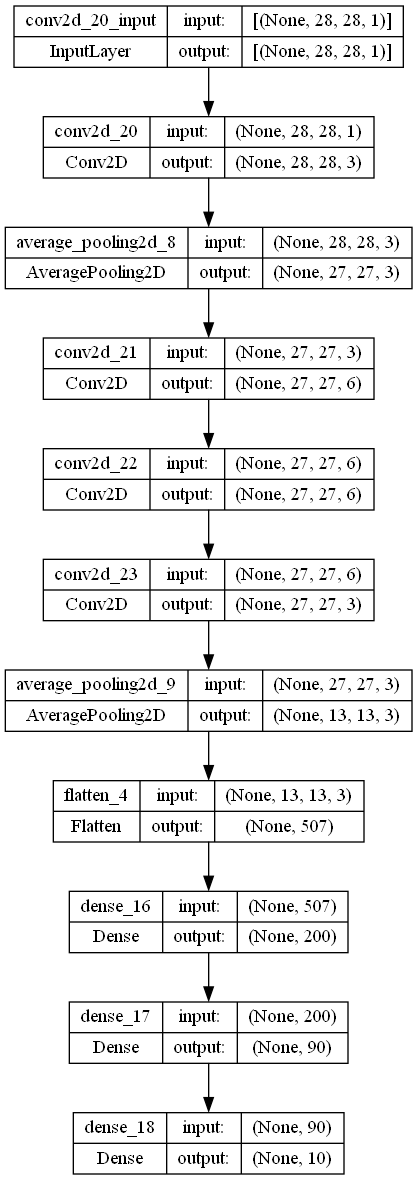

In [10]:
plot_model(model_dense_2,'model_sconv.png', show_shapes=True)

In [11]:
y_pred=model_dense_2.predict(x_test)

313/313 [==============================] - 7s 23ms/step


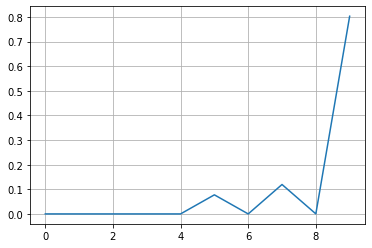

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


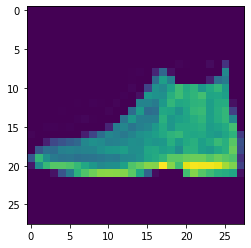

In [12]:
plt.plot(y_pred[0][:])
plt.grid()
plt.show()
#print(y_pred[0][:])
plt.imshow(x_test[0][:,:,0])
print(y_test[0][:])
plt.show()

## Пример на Keras более сложной сверточной нейронной сети

Давайте теперь попробуем сделать несколько усложненный вариант нейронной сети разобранной ранее. В ней будет на несколько слоев больше и в ней будет использоваться data augumentation, процедура позволяющая за счет искажений изображений увеличить количество тренировочных данных, а как мы знаем чем больше тренировочных данных тем лучше будет работать нейросеть. Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

In [ ]:
from __future__ import print_function
#import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:


# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
data_augmentation = False

In [ ]:
N = 101

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [ ]:


# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
model.summary()

Что вернет ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=15, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip= False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

In [ ]:
N=20
datagen.fit(x_test)
for imag,y  in datagen.flow(x_test[N:N+1,:,:,:],y_test[N:N+1], batch_size=1):
  plt.subplot(1,2,1)
  plt.imshow(x_test[N][:,:,:])
  plt.subplot(1,2,2)
  plt.imshow(imag[0,:,:,:])

  plt.show()
  if True:
    break


In [ ]:
 model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test))

In [ ]:
 model.fit(x_train, y_train,       batch_size=batch_size,epochs=5, validation_data=(x_test, y_test))

In [ ]:
N = 107
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

## Дополнительные материалы

<ol>
    <li>https://keras.io/layers/convolutional/</li>
    <li>https://keras.io/layers/pooling/</li>
    <li>https://keras.io/preprocessing/image/</li>
</ol>

Вопрос:

1. есть сверточный слой с ядром (2,2), ядер в слое 16, padding = 'valid', на вход приходит тензор (10,100,100, 4) , что будет на выходе (размер выходного тензора)

2. есть слой MaxPooling2D с ядром (2,2),  padding = 'valid', на вход приходит тензор (10,100,100, 4) , что будет на выходе (размер выходного тензора)

3. есть сверточный слой с ядром (3,3), ядер в слое 16, padding = 'same', на вход приходит тензор (10,100,100, 4) , что будет на выходе (размер выходного тензора)

4. есть сверточный слой с ядром (3,3), ядер в слое 16, padding = 'valid', на вход приходит тензор (10,100,100, 4) , сколько параметров настраиваем

5. есть слой MaxPooling2D с ядром (2,2),padding = 'valid', на вход приходит тензор (10,100,100, 4) , сколько параметров настраиваем

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко Сергей Игоревич, Кадурин А. А. - Глубокое обучение. Погружение в мир нейронных сетей  2018</li>
    <li>Francois Chollet - Deep Learning with Python 2018</li>
    <li>Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton - ImageNet Classification with Deep Convolutional Neural Networks</li>
    <li>Karen Simonyan, Andrew Zisserman - Very Deep Convolutional Networks for Large-Scale Image Recognition</li>
    <li>Википедия</li>    
</ol>

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(x,y),(d,h) =imdb.load_data(path='imdb.npz')

In [ ]:
h[:10]

In [ ]:
y[:10]